# Quick Recap about the Basic

Use functions in python to makes everything looks formated.

There are many QR generator website you can use to obtain samples:
- https://www.the-qrcode-generator.com/


In [6]:
from __future__ import print_function
import pyzbar.pyzbar as pyzbar
import numpy as np
import cv2
from matplotlib import pyplot as plt 

%matplotlib inline

def decode(im) : 
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)
    # Print results
    for obj in decodedObjects:
        print('Type : ', obj.type)
        print('Data : ', obj.data,'\n')     
    return decodedObjects
 
# Display barcode and QR code location  
def display(im, decodedObjects):
    # Loop over all decoded objects
    for decodedObject in decodedObjects: 
        points = decodedObject.polygon
        # If the points do not form a quad, find convex hull
        if len(points) > 4 : 
          hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
          hull = list(map(tuple, np.squeeze(hull)))
        else : 
          hull = points
        # Number of points in the convex hull
        n = len(hull)
        # Draw the convext hull
        for j in range(0,n):
          cv2.line(im, hull[j], hull[ (j+1) % n], (255,0,0), 3)
    # Display results 
    #cv2.imshow("Results", im);
    #cv2.waitKey(0);
    return im

Type :  CODE128
Data :  b'LifeIsShortUsePython' 



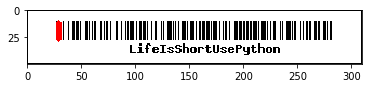

In [7]:
# Main 
if __name__ == '__main__': 
    im = cv2.imread('Bar_Images/code128_1.png')
    decodedObjects = decode(im)
    img = display(im, decodedObjects)
    plt.imshow(img, cmap = 'gray')    
    

Type :  QRCODE
Data :  b'https://www.latrobe.edu.au/' 



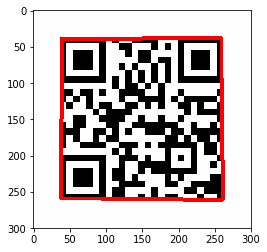

In [8]:
im = cv2.imread('QR_Images/QR_latrobe.png')
decodedObjects = decode(im)
img = display(im, decodedObjects)

plt.imshow(img, cmap = 'gray')    
   

Type :  QRCODE
Data :  b'https://www.latrobe.edu.au/' 

Type :  QRCODE
Data :  b'http://www.melbourne.vic.gov.au/Pages/home.aspx' 



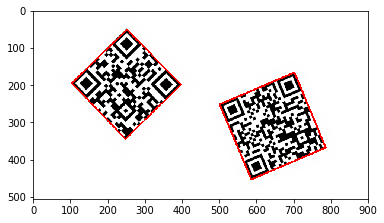

In [9]:
im = cv2.imread('QR_Images/QR_complex.png')
decodedObjects = decode(im)
img = display(im, decodedObjects)
plt.imshow(img, cmap = 'gray')    

# Using Webcam to Detect QR codes

Find more information about [openCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html)


- Type `q` to quit the webcamera
- Type `s` to take a snapshoot


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 7 11:41:42 2018

@author: Caihao.Cui
"""
from __future__ import print_function

import pyzbar.pyzbar as pyzbar
import numpy as np
import cv2
import time

# get the webcam:  
cap = cv2.VideoCapture(0)

cap.set(3,640)
cap.set(4,480)
#160.0 x 120.0
#176.0 x 144.0
#320.0 x 240.0
#352.0 x 288.0
#640.0 x 480.0
#1024.0 x 768.0
#1280.0 x 1024.0
time.sleep(2)

def decode(im) : 
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)
    # Print results
    for obj in decodedObjects:
        print('Type : ', obj.type)
        print('Data : ', obj.data,'\n')     
    return decodedObjects


font = cv2.FONT_HERSHEY_SIMPLEX

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
         
    decodedObjects = decode(im)

    for decodedObject in decodedObjects: 
        points = decodedObject.polygon
     
        # If the points do not form a quad, find convex hull
        if len(points) > 4 : 
          hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
          hull = list(map(tuple, np.squeeze(hull)))
        else : 
          hull = points;
         
        # Number of points in the convex hull
        n = len(hull)     
        # Draw the convext hull
        for j in range(0,n):
          cv2.line(frame, hull[j], hull[ (j+1) % n], (255,0,0), 3)

        x = decodedObject.rect.left
        y = decodedObject.rect.top

        print(x, y)

        print('Type : ', decodedObject.type)
        print('Data : ', decodedObject.data,'\n')

        barCode = str(decodedObject.data)
        cv2.putText(frame, barCode, (x, y), font, 1, (0,255,255), 2, cv2.LINE_AA)
               
    # Display the resulting frame
    cv2.imshow('frame',frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break
    elif key & 0xFF == ord('s'): # wait for 's' key to save 
        cv2.imwrite('Capture.png', frame)     

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Here is a caputer of myself holding a printed paper with two QR code:     
![webcam QR detection](Capture.png)    

**END**